## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
proportion_of_users_converted =df[df['converted']==1].count()['user_id']/df['user_id'].nunique()
proportion_of_users_converted

0.12126269856564711

In [7]:
new_control = df[(df['landing_page']=='new_page') & (df['group'] =='control')].count()['user_id']
old_treatment =df[(df['landing_page']=='old_page') & (df['group'] =='treatment')].count()['user_id']
total_number = new_control + old_treatment
total_number

3893

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
c_with_new = df.query('group=="control" and landing_page =="new_page"')
df2 = df.drop(c_with_new.index)

In [10]:
t_with_old = df.query('group=="treatment" and landing_page =="old_page"')
df2 = df2.drop(t_with_old.index)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2['user_id'].value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.drop(index=2893)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df2.query('group=="control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df2.query('group=="treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
df2.query('landing_page=="new_page"').count()['landing_page']/df2.shape[0]

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

<font color ='blue'><b> Even though the probability of user who receive new landing page is 50% but there is not enough evidence that new page leads to more conversion 
    <ul>
    <li>The average number of users who converted when user in control group equal to 12% </li>
    <li>The average number of users who converted when user in treatment group about also 12%</li>
        <li>So there is not sufficient evidence to conclude that the new treatment page leads to more conversions.</li>
    </ul></b>
</font>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$** : **$p_{new}$** - **$p_{old}$** <= 0  <br/>
**$H_{1}$** : **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = df2.query('group=="treatment"')['converted'].count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = df2.query('group=="control"')['converted'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice([0,1],size = n_new, p= [1-p_new,p_new])
new_page_converted_mean = new_page_converted.mean()
new_page_converted_mean

0.11984034133920583

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([0,1],size =n_old , p=[1-p_old,p_old])
old_page_converted_mean= old_page_converted.mean()
old_page_converted_mean

0.12030370197007036

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
diff = new_page_converted_mean - old_page_converted_mean
diff

-0.00046336063086452328

In [27]:
#we need to know observation diffs which came from original data to compare with one come from sampling data
obs_diff = df2.query('group=="treatment"')['converted'].mean() - df2.query('group=="control"')['converted'].mean()
obs_diff

-0.0015782389853555567

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1],size = n_new ,p= [1-p_new,p_new]).mean()
    old_page_converted = np.random.choice([0,1],size =n_old , p=[1-p_old,p_old]).mean()
    p_diffs.append(new_page_converted - old_page_converted  )

In [29]:
# #for more confirmation i will try calculate p-value with another way , i will create a random sample from each data set by using bootstraping for 
#original data "it took long time to run so i comment it "
# p_diffs_2 = []
# for _ in range(10000):
#     bs_new_page_converted = np.random.choice(df2.query('group=="treatment"')['converted'],replace=True,size = n_new).mean()
#     bs_old_page_converted = np.random.choice(df2.query('group=="control"')['converted'],replace=True,size =n_old).mean()
#     p_diffs_2.append(bs_new_page_converted - bs_old_page_converted  )

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

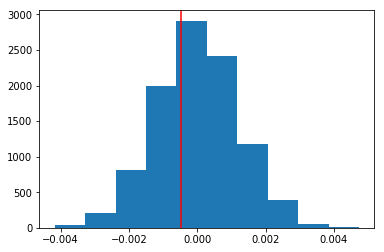

In [30]:
plt.hist(p_diffs);
plt.axvline(x=diff,color='red');

In [31]:
# p_diffs_2 = np.array(p_diffs_2) 

In [32]:
# #draw sampling distruption came from null hypothes and spread depends on std of sampling statistics
# null_values = np.random.normal(0,p_diffs_2.std(),p_diffs_2.size);
# plt.hist(null_values);
# plt.axvline(x=diff,color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
p_value = (p_diffs>obs_diff).mean()
p_value

0.90669999999999995

In [34]:
# p_value_2 = (null_values>obs_diff).mean()   
# p_value_2

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<font color ='blue'><b>
    We computed a p_value which it used to test our hypothesis and in our study p-value is almost 90% that is means our results have a 90% probability of being get by chance and not due to anything in our experiment<br/>
   then in this case p-value is not statistically significant so we fail to reject the null and that is means we don't have evidence that users prefer new webpage than old one
    </b> </font>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

convert_old = df2.query('group=="control" and converted==True').count()['user_id']
convert_new = df2.query('group=="treatment" and converted==True').count()['user_id']
n_old = df.query('landing_page =="old_page"').count()['user_id']
n_new = df.query('landing_page =="new_page"').count()['user_id']

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [36]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],alternative='smaller')
z_score, p_value

(1.2851562063649145, 0.90063114815551648)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<font color='blue'><b>
    we get the same p_value (.900) that we obtained from bootstrapping which it higher than our significant(0.05) so we fail to reject the Null hypothesis<br/>
    we use Standard Normal Distribution Table to get the proportion of the standard normal distribution to the left of a z-score, the normal distribution is 90% since 90% of the area below the normal distribution curve is to the left of the z-score of 1.28 that is means most data we have are generated from null hypothesis<br/>
    ** citation : https://www.thoughtco.com/standard-normal-distribution-table-3126264

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**<font color='blue'>Beacuse we want predict the conversion rate which is a categorical variable so we will use Logistic regression</font>**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [38]:
df2[['control','ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop('control',axis=1)
#df2[['old_page','new_page']] = pd.get_dummies(df2['landing_page'])
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [39]:
df2['intercept'] = 1
ls=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results= ls.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-08 22:25 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [41]:
1/np.exp(-0.0150)

1.0151130646157189

<font color='blue'><b> for every user receive the new page the conversion rate decrease by 1.015

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

<font color='blue'>
    <b>    threshold = 0.05 <br/>
    p-value = 19% <br/><br/>
    null hypothesis is : Pr(converted = 0 |ab_page) means the probabilty of user not convert when get the new page <br/>
    Alternative hypothesis : Pr(converted = 1 | ab_page)that is means the probabilty of user convert when get the new page<br/>
    The associated p-value is not statistically significant because p-value = 0.19 which is greater than our threshold(5%) so we fail to reject the Null<br/><br/>
        The differentiation in p-value came from number of sampling we used in the first part. we create 10000 sampling from original dataset that make our statistical near to whole population and gave us more accurate value 
But in logistic regression we just use in our dataset 

   </b> </font>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<font color='blue'><b>
to make more accurate prediction it better to use more than one predictor to illustrate what is the most factor effect on depended variable , Also many variable make the fitting of logistic regression curve more accurate <br/> <br/>
     variables might help to predict the conversion in my opinion :<br/>
    <ul><li>if user use desktop version or mobile version</li>
        <li>the user age or sex </li>
        <li>which country user is from</li></ul>
    <br/><br/>
but the disadvantage of adding addition terms ot regression model:<br/>
    <ol>
        <li> may be there is a correleation between two of independent variable</li><br/>
    <li>the way to collect data is very important and may be one independed variable didn't collect in a good way which is leads to wrong analysis to our data</li>
    </ol>
             
</b></font>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [42]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [43]:
df_countries = df_countries.join(pd.get_dummies(df_countries['country']))


In [44]:
df_countries.head()

,user_id,country,CA,UK,US
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


In [45]:
df2 = df2.join(df_countries.set_index('user_id'), on='user_id')

In [46]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1


In [47]:
 df2['US'].mean() , df2['UK'].mean(),df2['CA'].mean()

(0.70072337086694381, 0.24938055777331167, 0.049896071359744512)

<ul>
    <li>70% from users came from US</li>
    <li>25% from users came from UK</li>
    <li>only 5% from users came from CA</li>
</ul>

In [48]:
ls_countries = sm.Logit(df2['converted'],df2[['intercept','ab_page','UK','US']])
results_countries = ls_countries.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [49]:
results_countries.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-08 22:25 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [50]:
1/np.exp(-0.0149) , np.exp(0.0506) , np.exp(0.0408)

(1.0150115583846535, 1.0519020483004984, 1.0416437559600236)

<font color='blue'> when add countries as predictor for conversion rate we notice the following : <br/>
<ol>
    <li>for every user receieve new page the conversion rate decrease by 1.015</li>
    <li>for every user in UK (whether he got new or old page) the conversion rate is more than conversion rate of CA users by 1.0519</li>
    <li>for every user in US (whether he got new or old page) the conversion rate is more than conversion rate of CA users by 1.0416</li>
</ol>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
df2['ab_CA'] = df2['CA']*df2['ab_page']
df2['ab_UK'] = df2['UK']*df2['ab_page']
df2['ab_US'] = df2['US']*df2['ab_page']
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US,ab_CA,ab_UK,ab_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1,0,0,0


In [52]:
df2['ab_US'].mean()

0.35068345125677947

In [53]:
df2['ab_UK'].mean() 

0.12425322798227019

In [54]:
df2['ab_CA'].mean()

0.025125264983619194

In [55]:
ls_count_lp = sm.Logit(df2['converted'],df2[['intercept','ab_UK','ab_US']])
results_count_lp = ls_count_lp.fit()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


In [56]:
results_count_lp.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-08 22:25 AIC:              212781.7674
No. Observations:   290584           BIC:              212813.5064
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9926    0.0079  -252.9104  0.0000  -2.0081  -1.9772
ab_UK         0.0112    0.0179     0.6256  0.5316  -0.0240   0.0464
ab_US        -0.0144    0.0125    -1.1548  0.2482  -0.0389   0.0101
==================================================================

"""

In [57]:
np.exp(0.0112),1/np.exp(-0.0144)

(1.0112629548117711, 1.0145041794607625)

<font color='blue'> when add countries as predictor for conversion rate we notice the following : <br/>
<ol>
    <li>for every user in UK recieve new page the conversion rate is<b> more</b> than conversion rate came from CA users by 1.011 and p_value for ab_UK  is 53% </li>
    <li>for every user in US recieve new page the conversion rate is <b>less</b> than conversion rate came from  CA users by 1.014 and p-value for ab_US us 25%</li>
</ol>

<font color='blue'><b>
    Final conclution<br/>
there is no evidence that users prefer the new page ,even thought when we add countries as a new predictor for conversation  all p_value we got are greater than 5% <br/>
So we can't reject the null  and it better that not launch the new website  
 

Citations <br/>
https://www.thoughtco.com/standard-normal-distribution-table-3126264<br/>
wikipedia.org<br/>
investopedia<br/>
https://www.youtube.com/watch?v=Z_pwYU5FVIs

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0